## Image Augmentation Framework for the Object detection model

### Necessary packages

In [1]:
import imgaug as ia
from imgaug import augmenters as iaa
from imgaug.augmentables.bbs import BoundingBox, BoundingBoxesOnImage
import numpy as np
import pandas as pd
import os
import cv2
from matplotlib import pyplot as plt
from itertools import combinations
from tqdm import tqdm
import gc
gc.enable()
%matplotlib inline

In [2]:
%cd ../train/images/

/media/camivasz/D6E67D60E67D4233/Nowcasting/train/images


### Images reading

In [3]:
train = []
for i in os.listdir("train"):
    if i[-4:] == ".jpg": train.append(i)
tr = {}
for i in range(len(train)):
    tr[train[i]] = (cv2.imread("train/"+train[i]))

In [6]:
img = train[0]
r = train_labels.loc[img,:].copy()
re = r
a = re.shape[0]
bb = []
for i in range(a):
    bb.append(ia.BoundingBox(x1 = list(re['xmin'])[i], 
                             x2 = list(re['xmax'])[i],
                             y1 = list(re['ymin'])[i],
                             y2 = list(re['ymax'])[i]))
bbs = BoundingBoxesOnImage(bb, shape=tr[img].shape)
image_before = bbs.draw_on_image(tr[img], size=2)

array([[[148, 157, 147],
        [140, 148, 138],
        [154, 156, 150],
        ...,
        [ 66,  80,  69],
        [ 64,  78,  67],
        [ 64,  78,  67]],

       [[156, 164, 154],
        [145, 150, 141],
        [154, 154, 148],
        ...,
        [ 69,  83,  72],
        [ 61,  75,  64],
        [ 56,  70,  59]],

       [[142, 143, 134],
        [130, 128, 120],
        [136, 132, 127],
        ...,
        [ 10,  21,  13],
        [  8,  19,  11],
        [  6,  17,   9]],

       ...,

       [[ 96,  82,  83],
        [ 96,  82,  83],
        [ 95,  81,  82],
        ...,
        [121,  90,  93],
        [112,  79,  83],
        [108,  75,  79]],

       [[ 96,  82,  83],
        [ 95,  81,  82],
        [ 94,  80,  81],
        ...,
        [138, 107, 110],
        [120,  87,  91],
        [107,  74,  78]],

       [[ 96,  82,  83],
        [ 95,  81,  82],
        [ 94,  80,  81],
        ...,
        [157, 126, 129],
        [135, 102, 106],
        [118,  85,  89]]

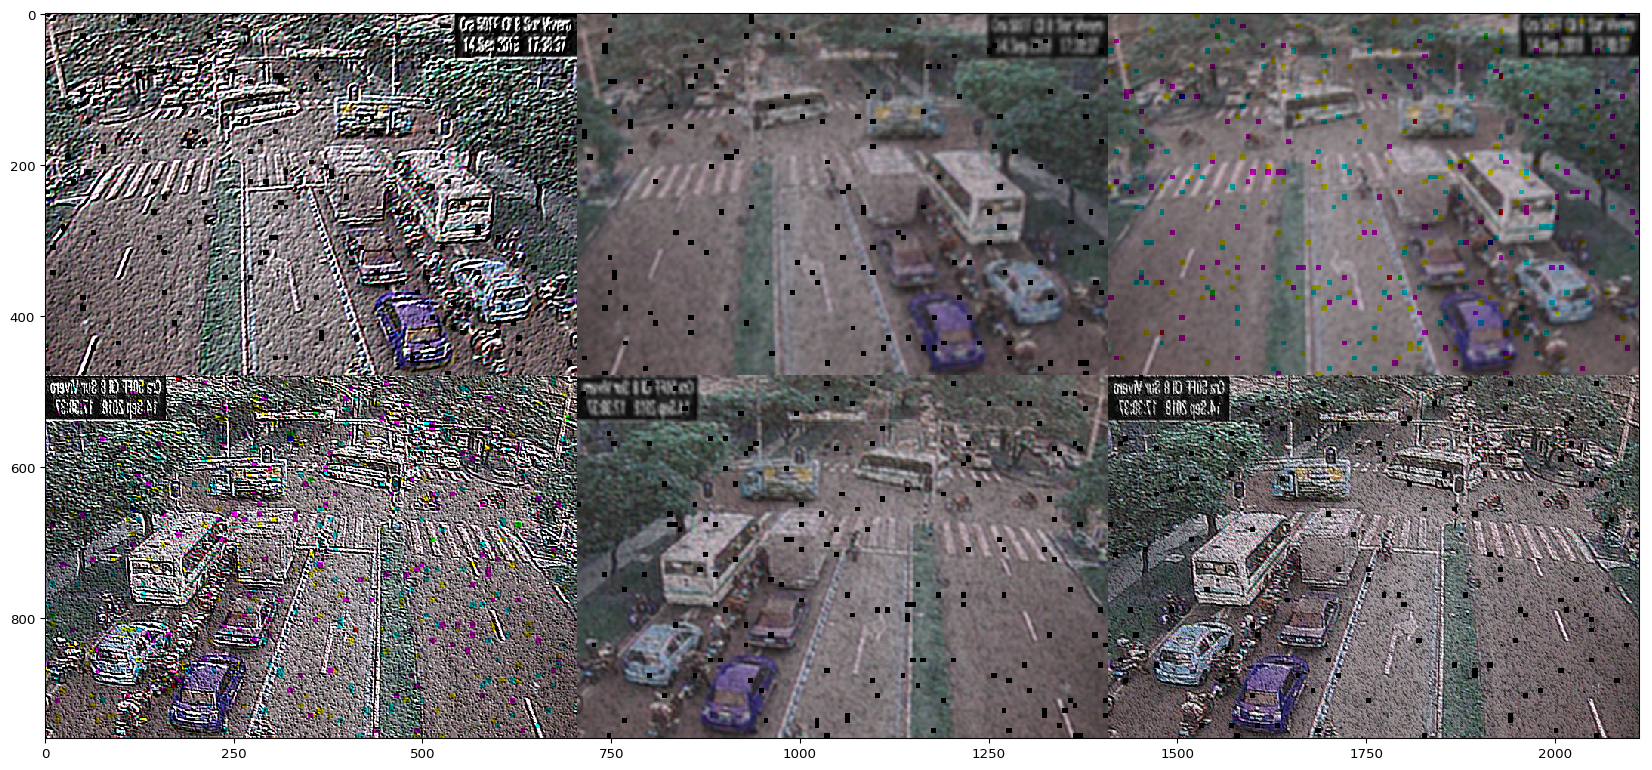

In [19]:
images = np.random.randint(0, 255, (16, 128, 128, 3), dtype=np.uint8)
seq = iaa.Sequential([iaa.Sharpen(alpha=1.0),
               iaa.Dropout(p=(0, 0.2)),
               iaa.GaussianBlur(sigma=(0.0, 3.0)),
               iaa.MotionBlur(angle = 40, k = 3),
               iaa.Emboss(alpha=(0.0, 1.0), strength=(0.5, 1.5)),
               iaa.CoarseDropout(0.02, size_percent=0.15, per_channel=0.5),
               iaa.Fliplr(0.5)])

# Show an image with 8*8 augmented versions of image 0 and 8*8 augmented
# versions of image 1. Identical augmentations will be applied to
# image 0 and 1.
seq.show_grid([tr[train[0]]], cols=3, rows=2)

## Augmentations
We are going to apply some transformations to all the images, such as flipping, blur, noise and affine transform.

In [5]:
train_labels = pd.read_csv("train_labels.csv", index_col = 0)

In [6]:
!mkdir augmented

In [ ]:
iaa.Sequential([iaa.Affine(rotate=np.random.choice([10, 15, 20, 25]), fit_output = True),
               iaa.Sharpen(alpha=1.0),
               iaa.CropAndPad(percent=(-0.3, 0.3)),
               iaa.AddElementwise((-40, 40)),
               iaa.Dropout(p=(0, 0.2))
               iaa.GaussianBlur(sigma=(0.0, 3.0)),
               iaa.MotionBlur(angle = 40, k = 35),
               iaa.Emboss(alpha=(0.0, 1.0), strength=(0.5, 1.5)),
               iaa.WithColorspace(to_colorspace="HSV",
                                  from_colorspace="RGB",
                                  children=iaa.WithChannels(0, iaa.Add((10, 50)))),
               iaa.Affine(translate_px={"x": (-20, 20), "y": (-20, 20)}),
               iaa.PiecewiseAffine(scale=(0.01, 0.05)),
               iaa.CoarseDropout(0.02, size_percent=0.15, per_channel=0.5),
               iaa.Fliplr(0.5)])

In [7]:
# Rotación
seq1 = iaa.Sequential([iaa.Affine(rotate=np.random.choice([10, 15, 20, 25]), fit_output = True)])

# Sharpen
seq11 = iaa.Sequential([iaa.Sharpen(alpha=1.0)])

# Corte
seq2 = iaa.Sequential([iaa.CropAndPad(percent=(-0.3, 0.3))])

# Add element wise
seq22 = iaa.Sequential([iaa.AddElementwise((-40, 40))])

# Dropout
seq3 = iaa.Sequential([iaa.Dropout(p=(0, 0.2))])

# Gaussian Blur
seq33 = iaa.Sequential([iaa.GaussianBlur(sigma=(0.0, 3.0))])

# Motion Blur
seq4 = iaa.Sequential([iaa.MotionBlur(angle = 40, k = 35)])

# Emboss
seq44 = iaa.Sequential([iaa.Emboss(alpha=(0.0, 1.0), strength=(0.5, 1.5))])

# color change
seq5 = iaa.Sequential([iaa.WithColorspace(
    to_colorspace="HSV",
    from_colorspace="RGB",
    children=iaa.WithChannels(0, iaa.Add((10, 50)))
)])

# Piecewise affine
seq55 = iaa.Sequential([iaa.PiecewiseAffine(scale=(0.01, 0.05))])

# increase redness
seq6 = iaa.Sequential([iaa.WithChannels(0, iaa.Add((10, 100)))])

# Coarse dropout
seq66 = iaa.Sequential([iaa.CoarseDropout((0.0, 0.05), size_percent=(0.02, 0.25))])

# Flipr
seq7 = iaa.Sequential([iaa.Fliplr(0.5)])

# Coarse dropout with color
seq77 = iaa.Sequential([iaa.CoarseDropout(0.02, size_percent=0.15, per_channel=0.5)])

# colorspace change
seq8 = iaa.Sequential([iaa.Sequential([
    iaa.ChangeColorspace(from_colorspace="RGB", to_colorspace="HSV"),
    iaa.WithChannels(0, iaa.Add((50, 100))),
    iaa.ChangeColorspace(from_colorspace="HSV", to_colorspace="RGB")
])])

# contrast normalization
seq88 = iaa.Sequential([iaa.ContrastNormalization((0.5, 1.5))])

# Affine moving
seq99 = iaa.Sequential([iaa.Affine(translate_px={"x": (-20, 20), "y": (-20, 20)})])

augmentations = [
    seq1,
    seq2,
    seq3,
    seq4,
    seq5,
    seq6,
    seq7,
    seq8,
    seq11,
    seq22,
    seq33,
    seq44,
    seq55,
    seq66,
    seq77,
    seq88,
    seq99
]

### Mixing them up
We will mix the different augmentations with each other.

In [8]:
aa = []
for j in range(1, 3):
    for i in combinations(range(len(augmentations)), j):
        aa.append(i)

In [ ]:
cv2.rectangle(tr[train[0]], pt2, pt1, Scalar(0, 255, 0), 2, 8, 0)

### Let the augmentation begin
The following function performs a set of augmentations 'aug', in an image 'img', with index 'aa' (this is used to name the new image). The parameter 'tes' indicates wether the image is in the test set or not. It also augmentates the bounding boxes, saves the image and returns the DataFrame associated with the labels in the bounding boxes.

In [15]:
def performAugmentation(augs, aa, img):
    r = train_labels.loc[img,:].copy()
    if type(r) != type(train_labels):
        re = pd.DataFrame(r).transpose() 
    else:
        re = r
    re = re.rename(index = {img:'augmented/'+str(aa)+img})
    image = cv2.imread('train/'+img)

    a = re.shape[0]
    bb = []
    img_aug = image
    for i in range(a):
        bb.append(ia.BoundingBox(x1 = list(re['xmin'])[i], 
                                 x2 = list(re['xmax'])[i],
                                 y1 = list(re['ymin'])[i],
                                 y2 = list(re['ymax'])[i]))
    # agumentation
    #cv2.rectangle(img, xmin, ymax, Scalar(0, 255, 0), 2, 8, 0)
    bb = ia.BoundingBoxesOnImage(bb, shape = tr.shape)
    bbs_aug = bb
    for i in augs:            
        image_aug = augmentations[i].augment_images([image])[0]
        bbs_aug = augmentations[i].augment_bounding_boxes([bb])[0]
        image = img_aug
        bb = bbs_aug

    cv2.imwrite('augmented/'+str(aa)+img, image_aug)

    xmin = []
    xmax = []
    ymin = []
    ymax = []
    for i in bbs_aug.bounding_boxes:
        xmin.append(i.x1)
        xmax.append(i.x2)
        ymin.append(i.y1)
        ymax.append(i.y2)
    re['xmin'] = xmin
    re['xmax'] = xmax
    re['ymin'] = ymin
    re['ymax'] = ymax

    return re

Now, with the read images in the train and test directories, we perform the augmentations.

In [16]:
for i in tqdm(range(len(aa))):
    for j in train: 
        re = performAugmentation(aa[i], i, j)
        train_labels = pd.concat([train_labels, re])

  0%|          | 0/153 [00:00<?, ?it/s]


NameError: name 'test' is not defined

### Save your work!
We save a .csv containing all of the images with their labels. 

In [ ]:
test_labels.to_csv('test_labels.csv')
train_labels.to_csv('train_labels.csv')